# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


### This case study prepared by Keval Menon

## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade spaCy
!pip install --upgrade scipy
!pip install --upgrade pydantic
!pip install wordcloud
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.6/463.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
pip install plotly

## Importing the necessary libraries

In [3]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [13]:
# Import the first file - True.csv
df_true = pd.read_csv('/content/drive/MyDrive/True.csv')


# Import the second file - Fake.csv
df_fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [14]:
# Inspect the DataFrame with True News to understand the given data
df_true.head()


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [15]:
# Inspect the DataFrame with Fake News to understand the given data
df_fake.head()


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [16]:
# Print the column details for True News DataFrame
df_true.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [17]:
# Print the column details for Fake News Dataframe
df_fake.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [18]:
# Print the column names of both DataFrames
print("Columns in True News DataFrame:", df_true.columns.tolist())
print("Columns in Fake News DataFrame:", df_fake.columns.tolist())


Columns in True News DataFrame: ['title', 'text', 'date']
Columns in Fake News DataFrame: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [19]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label'] = 0


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [20]:
# Combine the true and fake news DataFrames into a single DataFrame
df_combined = pd.concat([df_true, df_fake], ignore_index=True)


In [21]:
# Display the first 5 rows of the combined DataFrame to verify the result
df_combined.head()


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [22]:
# Check Presence of Null Values
df_combined.isnull().sum()


title         21
text          21
date          42
news_label     0
dtype: int64

In [23]:
# Handle Rows with Null Values
df_combined = df_combined.dropna(subset=['title', 'text'])
df_combined.isnull().sum()


title          0
text           0
date          21
news_label     0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [24]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df_combined['news_text'] = df_combined['title'] + ' ' + df_combined['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
df_combined = df_combined.drop(columns=['title', 'text',  'date'])

# Display the first 5 rows of the updated DataFrame to check the result
df_combined.head()


news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [25]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = df_combined['news_text']


# Add 'news_label' column to the new dataframe for topic identification
df_clean = pd.DataFrame(df_clean)
df_clean['news_label'] = df_combined['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [26]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers


def clean_text(text):    # Convert text to lower case
    text = text.lower()

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)

    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace

    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [27]:
# Apply the function to clean the news text and remove all unnecessary elements
tqdm.pandas(desc='cleaning text')


# Store it in a separate column in the new DataFrame
df_clean['cleaned_news_text'] = df_clean['news_text'].progress_apply(clean_text)

df_clean.head()




cleaning text: 100%|██████████| 44919/44919 [00:46<00:00, 965.68it/s]


news_text  news_label  \
0  As U.S. budget fight looms, Republicans flip t...           1   
1  U.S. military to accept transgender recruits o...           1   
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1   
3  FBI Russia probe helped by Australian diplomat...           1   
4  Trump wants Postal Service to charge 'much mor...           1   

                                   cleaned_news_text  
0  as us budget fight looms republicans flip thei...  
1  us military to accept transgender recruits on ...  
2  senior us republican senator let mr mueller do...  
3  fbi russia probe helped by australian diplomat...  
4  trump wants postal service to charge much more...

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [28]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

def lemmatize_nouns(text):
    """
    Lemmatize text, keeping only nouns (NN and NNS), and removing stopwords/punctuation.
    Returns a space-separated string of lemmatized nouns.
    """
    doc = nlp(text)
    nouns = [token.lemma_ for token in doc if token.pos_ in ['NOUN'] and not token.is_stop and not token.is_punct]
    return " ".join(nouns)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [29]:
# Apply POS tagging and lemmatization function to cleaned text
tqdm.pandas(desc='lemmatizing nouns')
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_nouns'] = df_clean['cleaned_news_text'].progress_apply(lemmatize_nouns)



lemmatizing nouns: 100%|██████████| 44919/44919 [53:56<00:00, 13.88it/s]


### Save the Cleaned data as a csv file (Recommended)

In [30]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("/content/drive/MyDrive/clean_df_01.csv", index=False)


# df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("/content/drive/MyDrive/clean_df_01.csv")

In [31]:
# Check the first few rows of the DataFrame
df_clean.head()


news_text  news_label  \
0  As U.S. budget fight looms, Republicans flip t...           1   
1  U.S. military to accept transgender recruits o...           1   
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1   
3  FBI Russia probe helped by Australian diplomat...           1   
4  Trump wants Postal Service to charge 'much mor...           1   

                                   cleaned_news_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                    lemmatized_nouns  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  job counsel investigation link election campai...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service amazon shipment service ship pac...

In [32]:
# Check the dimensions of the DataFrame
df_clean.shape


(44919, 4)

In [33]:
# Check the number of non-null entries and data types of each column
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   news_text          44919 non-null  object
 1   news_label         44919 non-null  int64 
 2   cleaned_news_text  44910 non-null  object
 3   lemmatized_nouns   44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [34]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_clean, test_size=0.3, stratify=df_clean['news_label'], random_state=42)


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31443 entries, 23048 to 35378
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   news_text          31443 non-null  object
 1   news_label         31443 non-null  int64 
 2   cleaned_news_text  31437 non-null  object
 3   lemmatized_nouns   31426 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [36]:
# Add a new column to calculate the character length of cleaned news text
train_df['clean_text_len'] = train_df['cleaned_news_text'].astype(str).apply(len)


# Add a new column to calculate the character length of lemmatized news text with POS tags removed

train_df['lemmatized_text_len'] = train_df['lemmatized_nouns'].astype(str).apply(len)

display(train_df.head())


news_text  news_label  \
23048   WATCH: Neo-Nazi Leader Regrets His Trump Vote...           0   
18142  Between Berlin and Bavaria: Merkel's uneasy al...           1   
27228   Fox Host: Anderson Cooper Is Gay, So He Can’t...           0   
15635  Hezbollah says Saudi Arabia forced Lebanon PM ...           1   
40691  HYSTERICAL LIBERALS CHEER FOR JOHN KERRY…He Ca...           0   

                                       cleaned_news_text  \
23048  watch neonazi leader regrets his trump vote bl...   
18142  between berlin and bavaria merkels uneasy alli...   
27228  fox host anderson cooper is gay so he can’t be...   
15635  hezbollah says saudi arabia forced lebanon pm ...   
40691  hysterical liberals cheer for john kerry…he ca...   

                                        lemmatized_nouns  clean_text_len  \
23048  leader trump vote lobby failure wall weekend n...             960   
18142  ally year wegscheid line refugee crisis week v...            4197   
27228  video attitude right male agenda job nation jo...            2526   
15635  leader calm patience ally declaration kingdom ...            1415   
40691                 liberal cheer guy secretary tongue             161   

       lemmatized_text_len  
23048                  267  
18142                 1334  
27228                  665  
15635                  326  
40691                   34

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

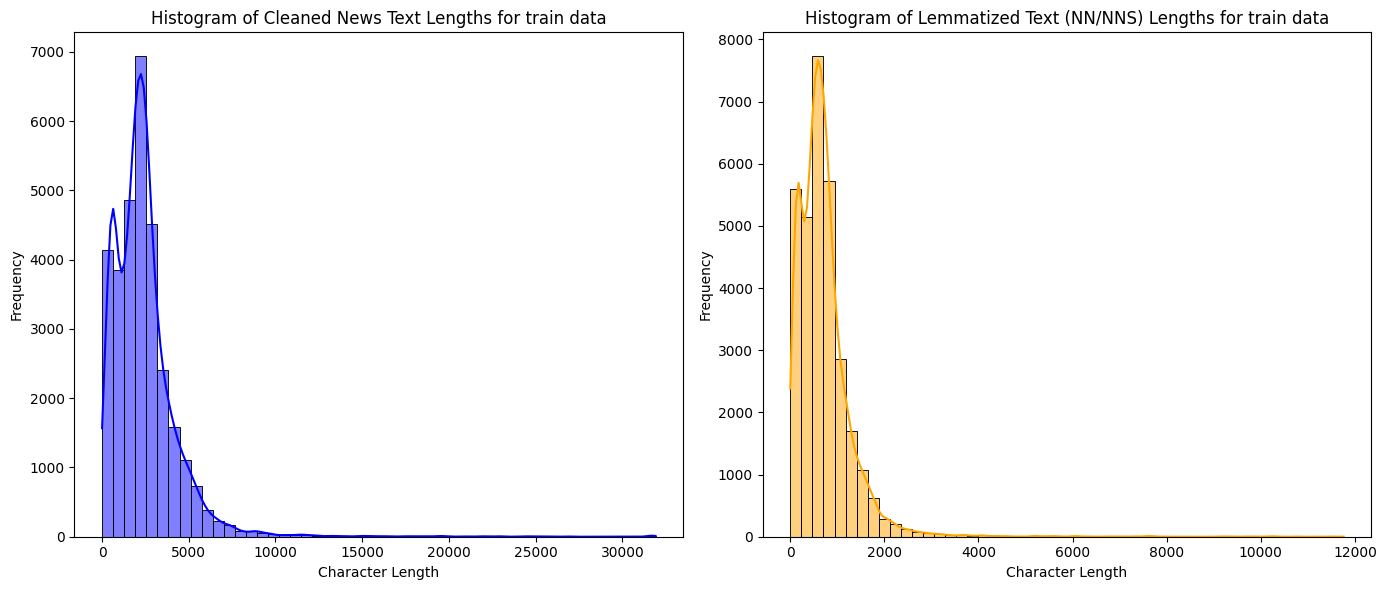

In [37]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(14,6))


# Add histogram for cleaned news text
plt.subplot(1,2,1)
sns.histplot(train_df['clean_text_len'], color='blue', label='Cleaned Text Length', kde=True, bins=50, alpha=0.5)
plt.title('Histogram of Cleaned News Text Lengths for train data')
plt.xlabel('Character Length')
plt.ylabel('Frequency')


# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1,2,2)
sns.histplot(train_df['lemmatized_text_len'], color='orange', label='Lemmatized Nouns Length', kde=True, bins=50, alpha=0.5)
plt.title('Histogram of Lemmatized Text (NN/NNS) Lengths for train data')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [38]:
train_df

news_text  news_label  \
23048   WATCH: Neo-Nazi Leader Regrets His Trump Vote...           0   
18142  Between Berlin and Bavaria: Merkel's uneasy al...           1   
27228   Fox Host: Anderson Cooper Is Gay, So He Can’t...           0   
15635  Hezbollah says Saudi Arabia forced Lebanon PM ...           1   
40691  HYSTERICAL LIBERALS CHEER FOR JOHN KERRY…He Ca...           0   
...                                                  ...         ...   
7147   Trump to hold series of meetings as he assembl...           1   
13665  Egypt security forces kill 11 suspected milita...           1   
2922   Factbox: Trump on Twitter - Media, American tr...           1   
12702  Poland's PM designate says will continue fight...           1   
35378  FIVE REASONS You Should Vote For Donald Trump ...           0   

                                       cleaned_news_text  \
23048  watch neonazi leader regrets his trump vote bl...   
18142  between berlin and bavaria merkels uneasy alli...   
27228  fox host anderson cooper is gay so he can’t be...   
15635  hezbollah says saudi arabia forced lebanon pm ...   
40691  hysterical liberals cheer for john kerry…he ca...   
...                                                  ...   
7147   trump to hold series of meetings as he assembl...   
13665  egypt security forces kill suspected militants...   
2922   factbox trump on twitter media american troops...   
12702  polands pm designate says will continue fighti...   
35378  five reasons you should vote for donald trump ...   

                                        lemmatized_nouns  clean_text_len  \
23048  leader trump vote lobby failure wall weekend n...             960   
18142  ally year wegscheid line refugee crisis week v...            4197   
27228  video attitude right male agenda job nation jo...            2526   
15635  leader calm patience ally declaration kingdom ...            1415   
40691                 liberal cheer guy secretary tongue             161   
...                                                  ...             ...   
7147   series meeting administration trump series mee...             922   
13665  security force militant raid security force mi...            1406   
2922   trump twitter medium troop stock market statem...             714   
12702  poland say tax evasion tax evasion government ...             585   
35378  reason trump language donald trump supporter m...             219   

       lemmatized_text_len  
23048                  267  
18142                 1334  
27228                  665  
15635                  326  
40691                   34  
...                    ...  
7147                   268  
13665                  505  
2922                   275  
12702                  165  
35378                   92  

[31443 rows x 6 columns]

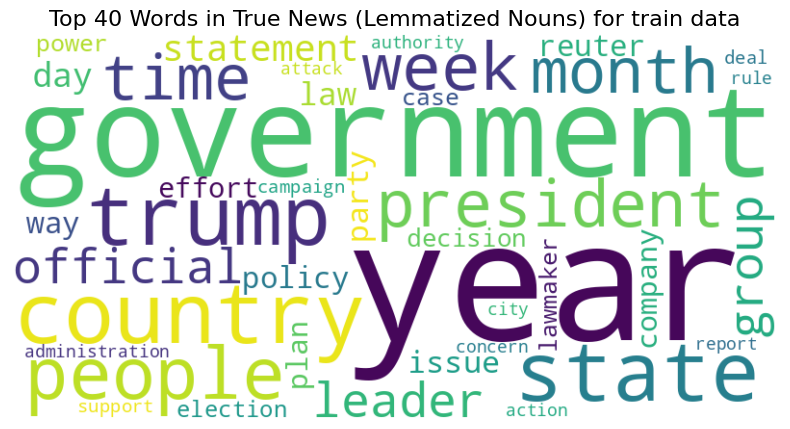

In [39]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud


# Filter news with label 1 (True News) and convert to it string and handle any non-string values

true_news_text = train_df[train_df['news_label'] == 1]['lemmatized_nouns']
true_news_corpus = ' '.join(true_news_text.dropna().astype(str))

# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_news_corpus)

# Plot the word cloud for True News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Lemmatized Nouns) for train data', fontsize=16)
plt.show()




##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

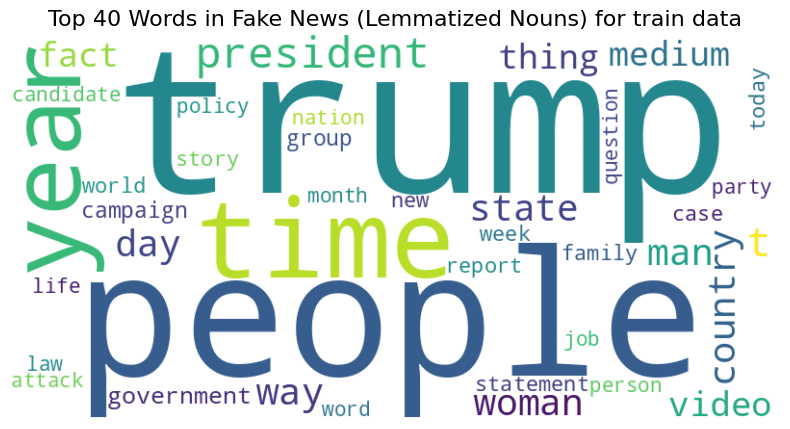

In [40]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text



# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

fake_news_text = train_df[train_df['news_label'] == 0]['lemmatized_nouns']
fake_news_corpus = ' '.join(fake_news_text.dropna().astype(str))

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_news_corpus)
# Plot the word cloud for Fake News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Lemmatized Nouns) for train data', fontsize=16)
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [41]:
# Write a function to get the specified top n-grams

def get_top_ngrams(corpus, n=None, ngram_range=(1,1)):
    """
    Function to get the top n-grams from the given text corpus.

    Parameters:
    corpus (list of str): List of text documents.
    n (int): Number of top n-grams to return.
    ngram_range (tuple): The lower and upper boundary of the range of n-values for different n-grams to be extracted.

    Returns:
    list of tuples: List containing the top n-grams and their frequencies.
    """
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]





In [42]:
# Function to plot top n-grams
def plot_ngrams(df, title):
    plt.figure(figsize=(10, 4))
    sns.barplot(x='frequency', y='ngram', data=df, palette='viridis')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [43]:
# Handle NaN values in the text data


true_corpus = train_df[train_df['news_label'] == 1]['lemmatized_nouns']
fake_corpus = train_df[train_df['news_label'] == 0]['lemmatized_nouns']

true_corpus = true_corpus.dropna().astype(str)
fake_corpus = fake_corpus.dropna().astype(str)



### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
[('trump', np.int64(31589)),
 ('state', np.int64(14169)),
 ('government', np.int64(13964)),
 ('year', np.int64(13298)),
 ('people', np.int64(10857)),
 ('election', np.int64(9917)),
 ('country', np.int64(9847)),
 ('official', np.int64(9363)),
 ('party', np.int64(8968)),
 ('president', np.int64(8089))]


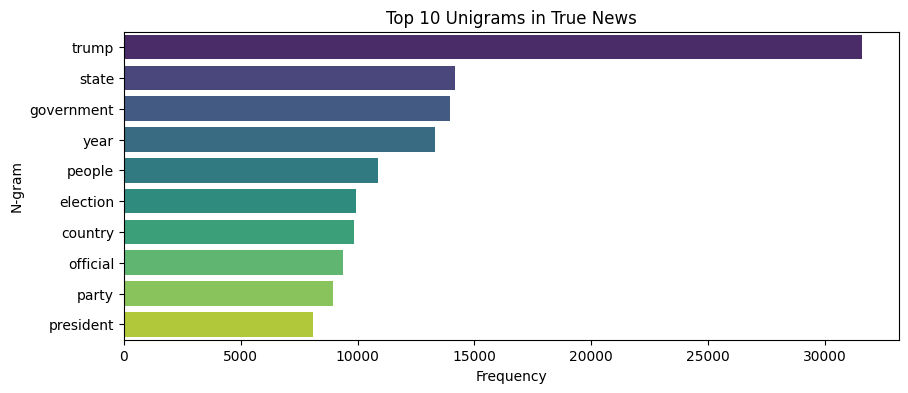

In [44]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_true_unigrams = get_top_ngrams(true_corpus, n=10, ngram_range=(1,1))
print("Top 10 Unigrams in True News:")
pprint(top_true_unigrams)
plot_ngrams(pd.DataFrame(top_true_unigrams, columns=['ngram', 'frequency']), "Top 10 Unigrams in True News")


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
[('trump campaign', np.int64(1531)),
 ('trump administration', np.int64(1367)),
 ('news conference', np.int64(958)),
 ('security force', np.int64(722)),
 ('request comment', np.int64(706)),
 ('tax reform', np.int64(701)),
 ('climate change', np.int64(687)),
 ('house representative', np.int64(680)),
 ('attorney general', np.int64(636)),
 ('intelligence agency', np.int64(628))]


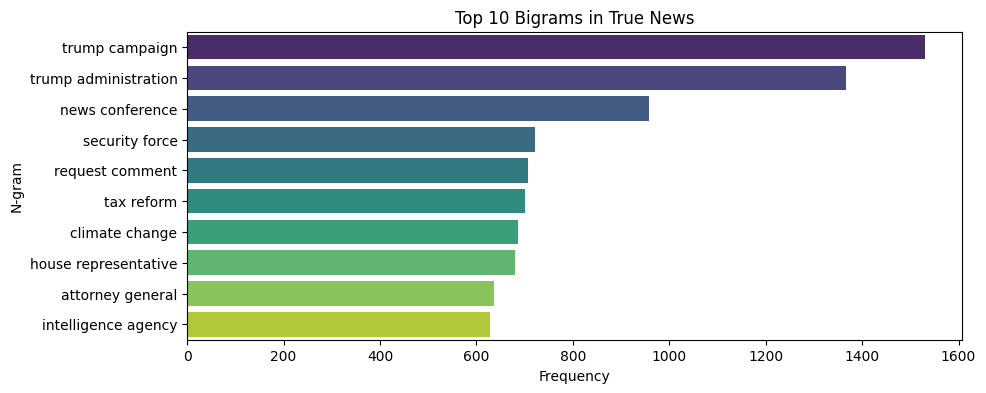

In [45]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_true_bigrams = get_top_ngrams(true_corpus, n=10, ngram_range=(2,2))
print("Top 10 Bigrams in True News:")
pprint(top_true_bigrams)
plot_ngrams(pd.DataFrame(top_true_bigrams, columns=['ngram', 'frequency']), "Top 10 Bigrams in True News")
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
[('official condition anonymity', np.int64(240)),
 ('trump transition team', np.int64(237)),
 ('candidate donald trump', np.int64(207)),
 ('tax rate percent', np.int64(152)),
 ('trump travel ban', np.int64(130)),
 ('article sap editorial', np.int64(122)),
 ('sap editorial staff', np.int64(122)),
 ('editorial staff sap', np.int64(122)),
 ('staff sap involvement', np.int64(122)),
 ('sap involvement creation', np.int64(122))]


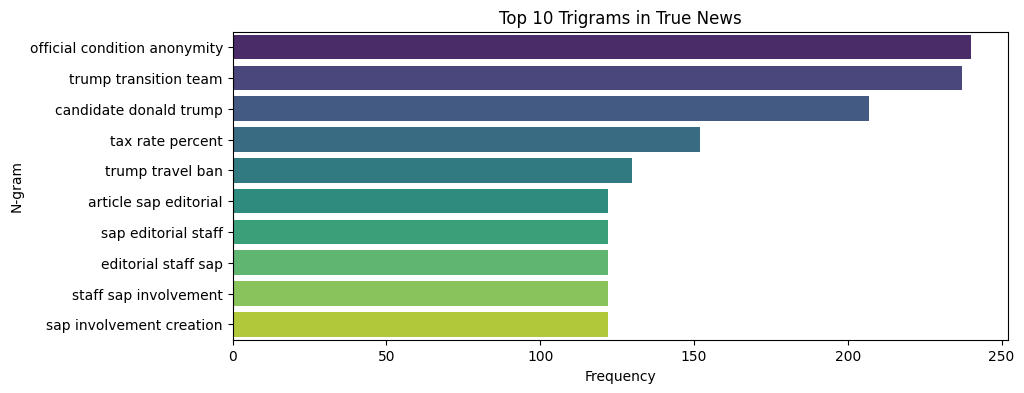

In [46]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_true_trigrams = get_top_ngrams(true_corpus, n=10, ngram_range=(3,3))
print("Top 10 Trigrams in True News:")
pprint(top_true_trigrams)
plot_ngrams(pd.DataFrame(top_true_trigrams, columns=['ngram', 'frequency']), "Top 10 Trigrams in True News")
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph



### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
[('trump', np.int64(42088)),
 ('people', np.int64(18536)),
 ('president', np.int64(11751)),
 ('time', np.int64(11313)),
 ('year', np.int64(10575)),
 ('image', np.int64(9780)),
 ('state', np.int64(9059)),
 ('woman', np.int64(8420)),
 ('video', np.int64(8189)),
 ('campaign', np.int64(7763))]


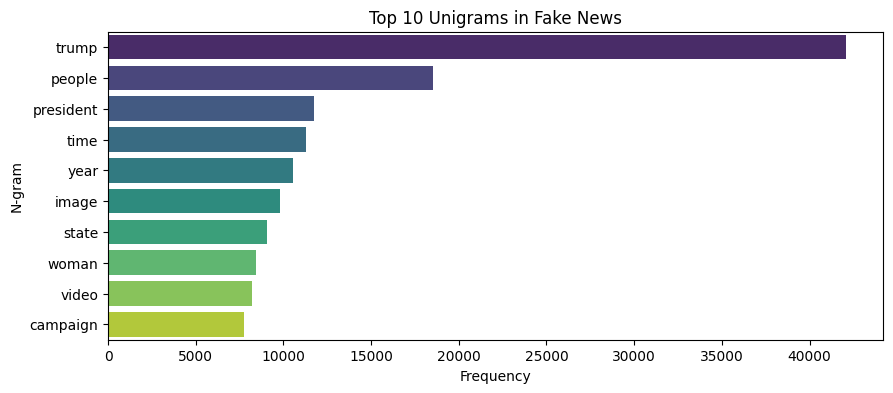

In [47]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_fake_unigrams = get_top_ngrams(fake_corpus, n=10, ngram_range=(1,1))
print("Top 10 Unigrams in Fake News:")
pprint(top_fake_unigrams)
plot_ngrams(pd.DataFrame(top_fake_unigrams, columns=['ngram', 'frequency']), "Top 10 Unigrams in Fake News")


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
[('trump supporter', np.int64(1552)),
 ('trump campaign', np.int64(1279)),
 ('president trump', np.int64(1258)),
 ('image image', np.int64(1188)),
 ('century wire', np.int64(1187)),
 ('police officer', np.int64(1176)),
 ('law enforcement', np.int64(1115)),
 ('donald trump', np.int64(981)),
 ('screen capture', np.int64(930)),
 ('trump trump', np.int64(771))]


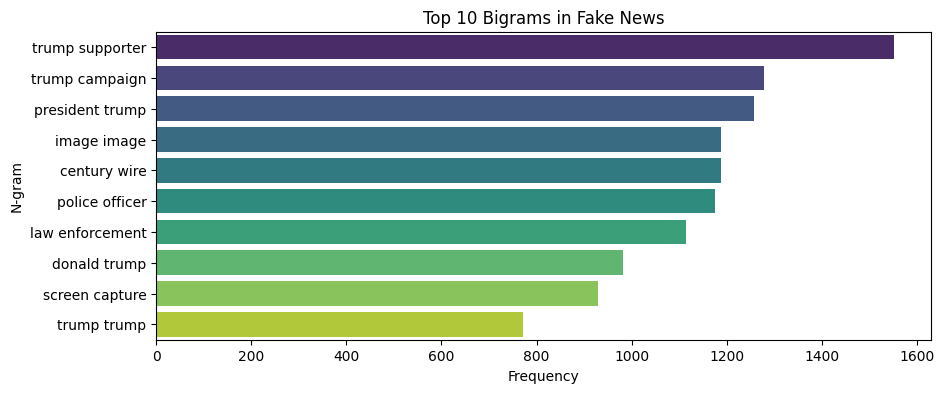

In [48]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_fake_bigrams = get_top_ngrams(fake_corpus, n=10, ngram_range=(2,2))
print("Top 10 Bigrams in Fake News:")
pprint(top_fake_bigrams)
plot_ngrams(pd.DataFrame(top_fake_bigrams, columns=['ngram', 'frequency']), "Top 10 Bigrams in Fake News")


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
[('news century wire', np.int64(574)),
 ('video screen capture', np.int64(516)),
 ('image video screen', np.int64(494)),
 ('image screen capture', np.int64(309)),
 ('image getty image', np.int64(301)),
 ('filessupport subscribe member', np.int64(194)),
 ('century wire filessupport', np.int64(182)),
 ('image video screenshot', np.int64(165)),
 ('image chip image', np.int64(162)),
 ('law enforcement officer', np.int64(161))]


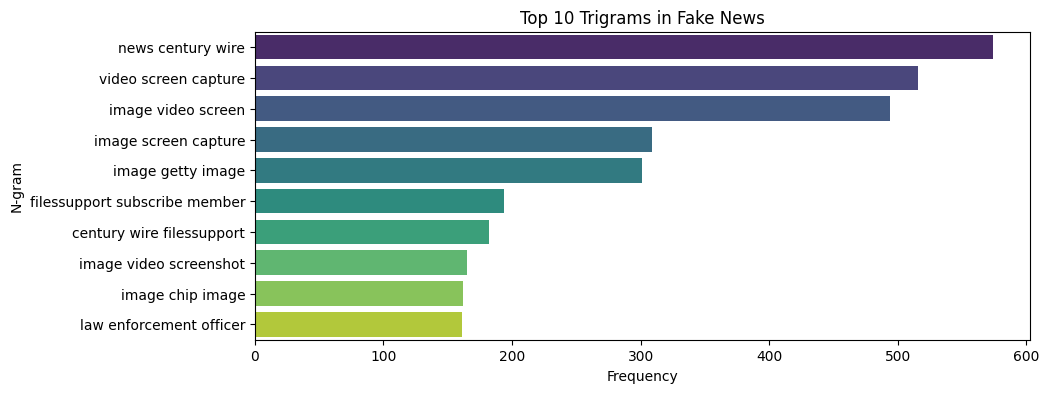

In [49]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_fake_trigrams = get_top_ngrams(fake_corpus, n=10, ngram_range=(3,3))
print("Top 10 Trigrams in Fake News:")
pprint(top_fake_trigrams)
plot_ngrams(pd.DataFrame(top_fake_trigrams, columns=['ngram', 'frequency']), "Top 10 Trigrams in Fake News")



## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [50]:
# Add a new column to calculate the character length of cleaned news text
val_df['clean_text_len'] = val_df['cleaned_news_text'].astype(str).apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val_df['lemmatized_text_len'] = val_df['lemmatized_nouns'].astype(str).apply(len)
display(val_df.head())


news_text  news_label  \
6115   White House says to have Supreme Court nominee...           1   
8121   California governor signs epinephrine bill, bl...           1   
44048  There’s Something Hokey About Ted 21st Century...           0   
5892   Canadian tech companies ask Ottawa to issue vi...           1   
21150  At least three dead as Lidia slams Mexico's Lo...           1   

                                       cleaned_news_text  \
6115   white house says to have supreme court nominee...   
8121   california governor signs epinephrine bill bla...   
44048  there’s something hokey about ted century wire...   
5892   canadian tech companies ask ottawa to issue vi...   
21150  at least three dead as lidia slams mexicos los...   

                                        lemmatized_nouns  clean_text_len  \
6115   court nominee couple week nominee couple week ...             614   
8121   epinephrine bill bill business state epinephri...            1752   
44048  century wire point theatric review genre youtu...             459   
5892   tech company visa technology company founder e...            2552   
21150  reuter people rain storm flooding resort autho...            1356   

       lemmatized_text_len  
6115                   154  
8121                   600  
44048                  134  
5892                   720  
21150                  391

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

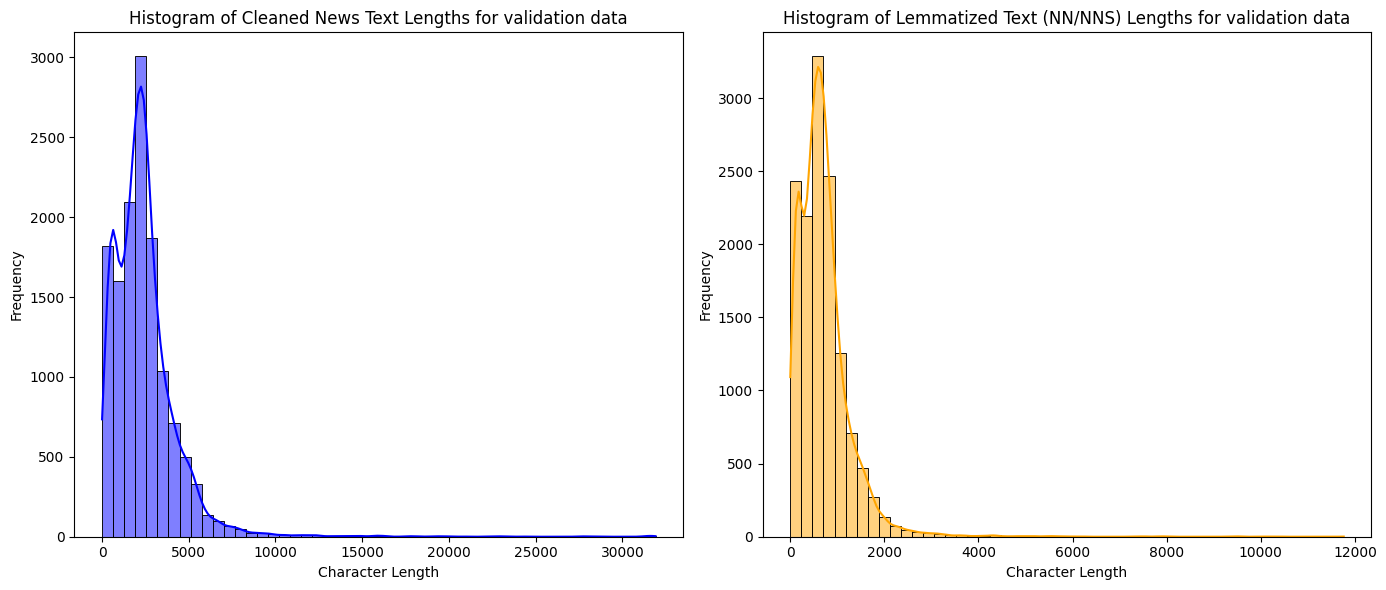

In [51]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(14,6))

# Add histogram for cleaned news text
plt.subplot(1,2,1)
sns.histplot(val_df['clean_text_len'], color='blue', label='Cleaned Text Length', kde=True, bins=50, alpha=0.5)
plt.title('Histogram of Cleaned News Text Lengths for validation data')
plt.xlabel('Character Length')
plt.ylabel('Frequency')


# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1,2,2)
sns.histplot(val_df['lemmatized_text_len'], color='orange', label='Lemmatized Nouns Length', kde=True, bins=50, alpha=0.5)
plt.title('Histogram of Lemmatized Text (NN/NNS) Lengths for validation data')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

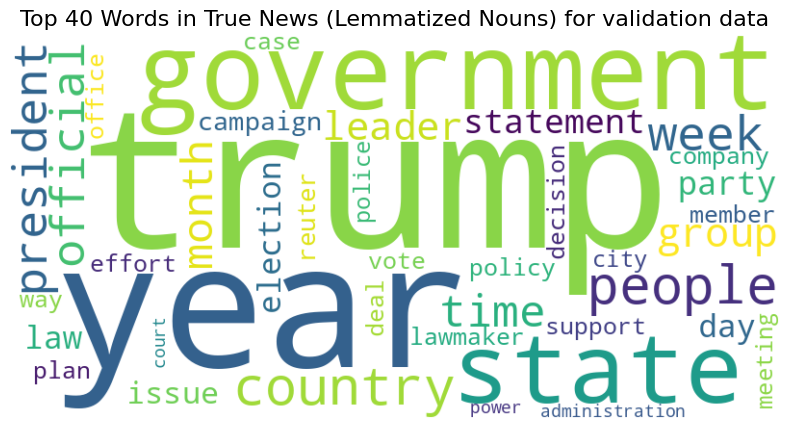

In [52]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = val_df[val_df['news_label'] == 1]['lemmatized_nouns']
true_news_corpus = ' '.join(true_news_text.dropna().astype(str))


# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_news_corpus)
# Plot the word cloud for True News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Lemmatized Nouns) for validation data', fontsize=16)
plt.show()



##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

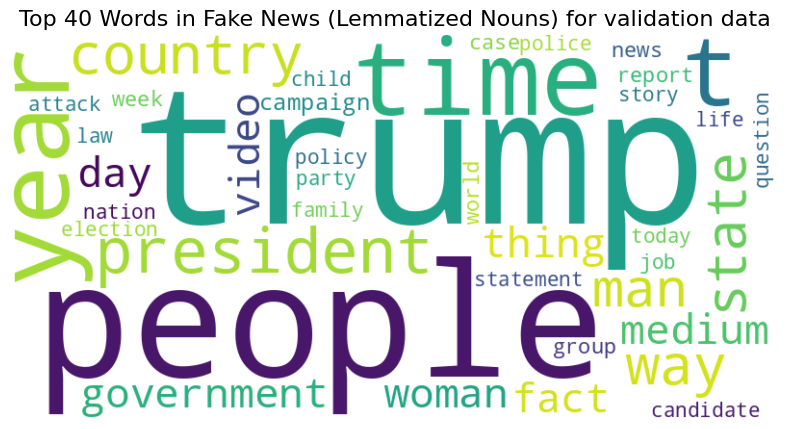

In [53]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = val_df[val_df['news_label'] == 0]['lemmatized_nouns']
fake_news_corpus = ' '.join(fake_news_text.dropna().astype(str))

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_news_corpus)
# Plot the word cloud for Fake News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Lemmatized Nouns) for validation data', fontsize=16)
plt.show()


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [54]:
## Write a function to get the specified top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(1,1)):
    """
    Function to get the top n-grams from the given text corpus.

    Parameters:
    corpus (list of str): List of text documents.
    n (int): Number of top n-grams to return.
    ngram_range (tuple): The lower and upper boundary of the range of n-values for different n-grams to be extracted.

    Returns:
    list of tuples: List containing the top n-grams and their frequencies.
    """
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



##### 5.3.2 Handle the NaN values

In [55]:
## First handle NaN values in the text data
true_corpus_val = val_df[val_df['news_label'] == 1]['lemmatized_nouns']
fake_corpus_val = val_df[val_df['news_label'] == 0]['lemmatized_nouns']
true_corpus_val = true_corpus.dropna().astype(str)
fake_corpus_val = fake_corpus.dropna().astype(str)


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

Top 10 Unigrams in True News:
[('trump', np.int64(31589)),
 ('state', np.int64(14169)),
 ('government', np.int64(13964)),
 ('year', np.int64(13298)),
 ('people', np.int64(10857)),
 ('election', np.int64(9917)),
 ('country', np.int64(9847)),
 ('official', np.int64(9363)),
 ('party', np.int64(8968)),
 ('president', np.int64(8089))]


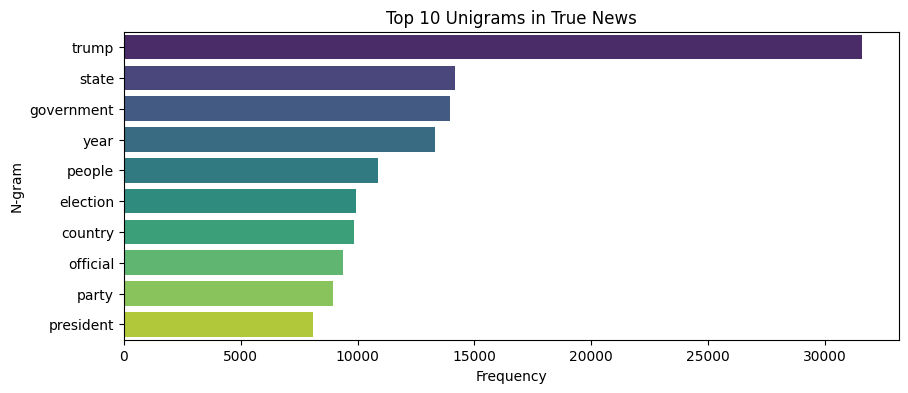

In [56]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_true_unigrams_val = get_top_ngrams(true_corpus_val, n=10, ngram_range=(1,1))
print("Top 10 Unigrams in True News:")
pprint(top_true_unigrams_val)
plot_ngrams(pd.DataFrame(top_true_unigrams_val, columns=['ngram', 'frequency']), "Top 10 Unigrams in True News")


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

Top 10 Bigrams in True News:
[('trump campaign', np.int64(1531)),
 ('trump administration', np.int64(1367)),
 ('news conference', np.int64(958)),
 ('security force', np.int64(722)),
 ('request comment', np.int64(706)),
 ('tax reform', np.int64(701)),
 ('climate change', np.int64(687)),
 ('house representative', np.int64(680)),
 ('attorney general', np.int64(636)),
 ('intelligence agency', np.int64(628))]


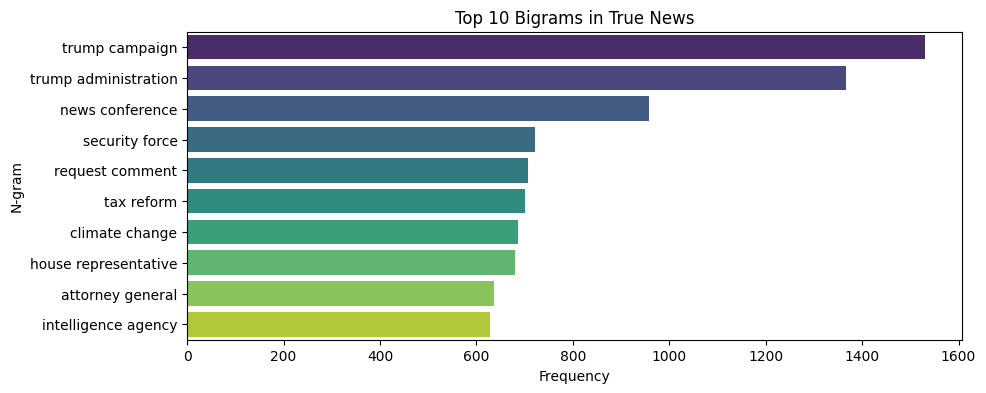

In [57]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_true_bigrams_val = get_top_ngrams(true_corpus_val, n=10, ngram_range=(2,2))
print("Top 10 Bigrams in True News:")
pprint(top_true_bigrams_val)
plot_ngrams(pd.DataFrame(top_true_bigrams_val, columns=['ngram', 'frequency']), "Top 10 Bigrams in True News")



##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

Top 10 Trigrams in True News:
[('official condition anonymity', np.int64(240)),
 ('trump transition team', np.int64(237)),
 ('candidate donald trump', np.int64(207)),
 ('tax rate percent', np.int64(152)),
 ('trump travel ban', np.int64(130)),
 ('article sap editorial', np.int64(122)),
 ('sap editorial staff', np.int64(122)),
 ('editorial staff sap', np.int64(122)),
 ('staff sap involvement', np.int64(122)),
 ('sap involvement creation', np.int64(122))]


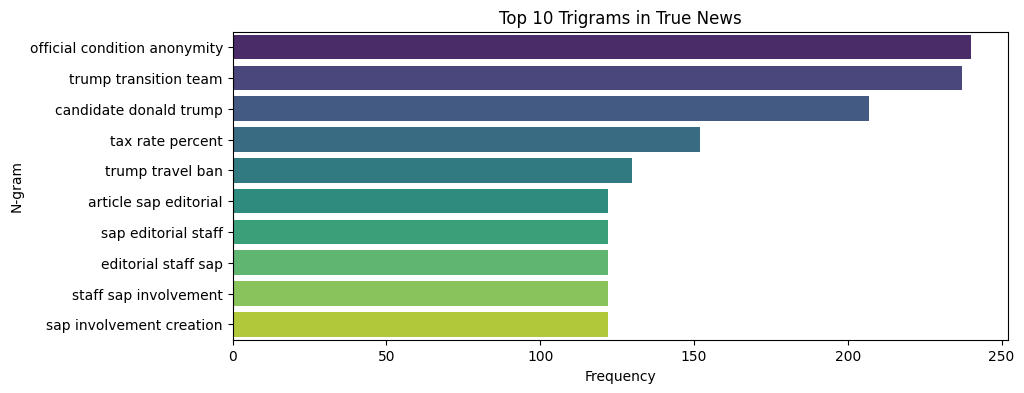

In [58]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_true_trigrams_val = get_top_ngrams(true_corpus_val, n=10, ngram_range=(3,3))
print("Top 10 Trigrams in True News:")
pprint(top_true_trigrams_val)
plot_ngrams(pd.DataFrame(top_true_trigrams_val, columns=['ngram', 'frequency']), "Top 10 Trigrams in True News")
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

Top 10 Unigrams in Fake News:
[('trump', np.int64(42088)),
 ('people', np.int64(18536)),
 ('president', np.int64(11751)),
 ('time', np.int64(11313)),
 ('year', np.int64(10575)),
 ('image', np.int64(9780)),
 ('state', np.int64(9059)),
 ('woman', np.int64(8420)),
 ('video', np.int64(8189)),
 ('campaign', np.int64(7763))]


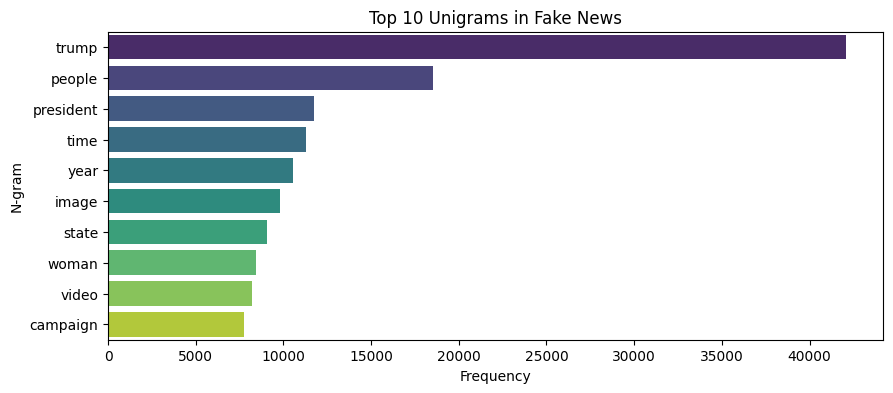

In [59]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_fake_unigrams_val = get_top_ngrams(fake_corpus_val, n=10, ngram_range=(1,1))
print("Top 10 Unigrams in Fake News:")
pprint(top_fake_unigrams_val)
plot_ngrams(pd.DataFrame(top_fake_unigrams_val, columns=['ngram', 'frequency']), "Top 10 Unigrams in Fake News")


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

Top 10 Bigrams in Fake News:
[('trump supporter', np.int64(1552)),
 ('trump campaign', np.int64(1279)),
 ('president trump', np.int64(1258)),
 ('image image', np.int64(1188)),
 ('century wire', np.int64(1187)),
 ('police officer', np.int64(1176)),
 ('law enforcement', np.int64(1115)),
 ('donald trump', np.int64(981)),
 ('screen capture', np.int64(930)),
 ('trump trump', np.int64(771))]


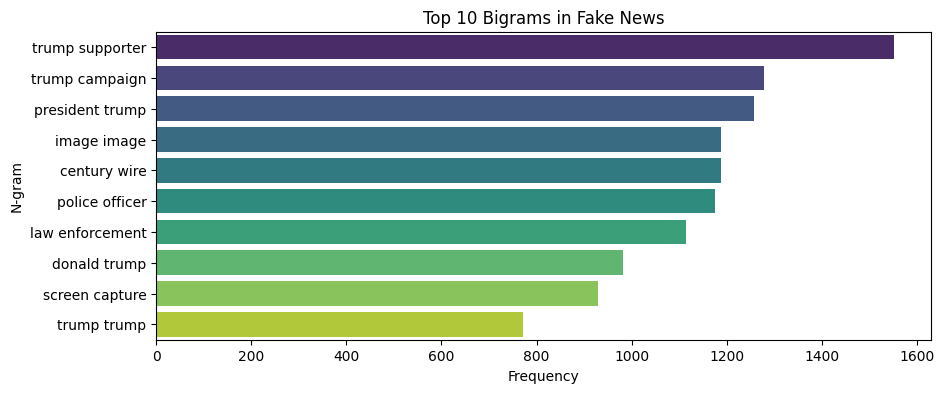

In [60]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_fake_bigrams_val = get_top_ngrams(fake_corpus_val, n=10, ngram_range=(2,2))
print("Top 10 Bigrams in Fake News:")
pprint(top_fake_bigrams_val)
plot_ngrams(pd.DataFrame(top_fake_bigrams_val, columns=['ngram', 'frequency']), "Top 10 Bigrams in Fake News")


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

Top 10 Trigrams in Fake News:
[('news century wire', np.int64(574)),
 ('video screen capture', np.int64(516)),
 ('image video screen', np.int64(494)),
 ('image screen capture', np.int64(309)),
 ('image getty image', np.int64(301)),
 ('filessupport subscribe member', np.int64(194)),
 ('century wire filessupport', np.int64(182)),
 ('image video screenshot', np.int64(165)),
 ('image chip image', np.int64(162)),
 ('law enforcement officer', np.int64(161))]


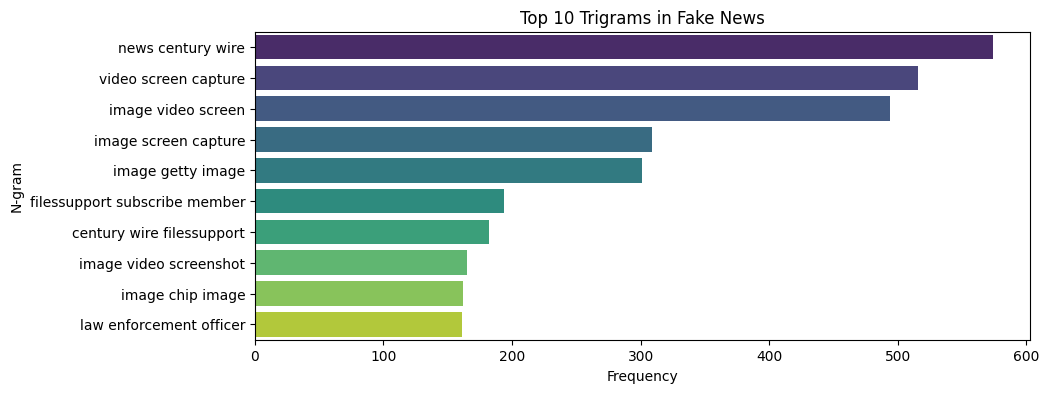

In [61]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_fake_trigrams_val = get_top_ngrams(fake_corpus_val, n=10, ngram_range=(3,3))
print("Top 10 Trigrams in Fake News:")
pprint(top_fake_trigrams_val)
plot_ngrams(pd.DataFrame(top_fake_trigrams_val, columns=['ngram', 'frequency']), "Top 10 Trigrams in Fake News")


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [64]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 50.4 MB/s eta 0:00:00


In [78]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")


KeyboardInterrupt: 

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [79]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def get_average_word2vec(tokens, model, vector_size=300):
    """
    Computes the mean Word2Vec embedding for the list of tokens present in the model.
    Returns a zero vector if no tokens are found in the model.
    """
    valid_vectors = [model[word] for word in tokens if word in model]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(vector_size)

## Extract the target variable for the training data and validation data

# Apply tokenization and vector extraction to training and validation data
print("Extracting Word2Vec embeddings...")
train_vectors = train_df['lemmatized_nouns'].dropna().apply(lambda x: get_average_word2vec(x.split(), word2vec_model))
val_vectors   = val_df['lemmatized_nouns'].dropna().apply(lambda x: get_average_word2vec(x.split(), word2vec_model))

# Convert Series of vectors to 2D numpy arrays
X_train = np.vstack(train_vectors.values)
X_val = np.vstack(val_vectors.values)

# Extract target variable
y_train = train_df.loc[train_vectors.index, 'news_label'].values
y_val   = val_df.loc[val_vectors.index, 'news_label'].values

# Output shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape  : {X_val.shape}, y_val shape  : {y_val.shape}")

Extracting Word2Vec embeddings...
X_train shape: (31426, 300), y_train shape: (31426,)
X_val shape  : (13472, 300), y_val shape  : (13472,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [80]:
## Initialise Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

## Train Logistic Regression model on training data
logreg_model.fit(X_train, y_train)


## Predict on validation data
y_val_pred = logreg_model.predict(X_val)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [82]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Accuracy: 0.9043
Precision: 0.8939
Recall: 0.9071
F1-Score: 0.9004


In [70]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=['Fake News', 'True News']))




Classification Report:
              precision    recall  f1-score   support

   Fake News       0.91      0.90      0.91      7047
   True News       0.89      0.91      0.90      6425

    accuracy                           0.90     13472
   macro avg       0.90      0.90      0.90     13472
weighted avg       0.90      0.90      0.90     13472



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [83]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(X_train, y_train)


## Predict on validation data
y_val_pred_dt = dt_model.predict(X_val)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [86]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
precision_dt = precision_score(y_val, y_val_pred_dt)
recall_dt = recall_score(y_val, y_val_pred_dt)
f1_dt = f1_score(y_val, y_val_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("\nClassification Report:")



Accuracy: 0.8224
Precision: 0.8278
Recall: 0.7924
F1-Score: 0.8097

Classification Report:


In [73]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_dt, target_names=['Fake News', 'True News']))



Classification Report:
              precision    recall  f1-score   support

   Fake News       0.82      0.85      0.83      7047
   True News       0.83      0.79      0.81      6425

    accuracy                           0.82     13472
   macro avg       0.82      0.82      0.82     13472
weighted avg       0.82      0.82      0.82     13472



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [74]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Train Random Forest model on training data
rf_model.fit(X_train, y_train)

## Predict on validation data
y_val_pred_rf = rf_model.predict(X_val)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [75]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Accuracy: 0.9081
Precision: 0.9104
Recall: 0.8954
F1-Score: 0.9029


In [76]:
# Classification Report

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf, target_names=['Fake News', 'True News']))



Classification Report:
              precision    recall  f1-score   support

   Fake News       0.91      0.92      0.91      7047
   True News       0.91      0.90      0.90      6425

    accuracy                           0.91     13472
   macro avg       0.91      0.91      0.91     13472
weighted avg       0.91      0.91      0.91     13472



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

 ```markdown
 # Patterns Observed in News Articles

- ## True news generally exhibited :
    * Formal, structured language often with references to government entities, officials, or international bodies
    * Frequent use of proper nouns (e.g., "Trump", "government", "election", "state department")
    * Rich, diverse vocabulary with technical or political terminology
    * Trigram patterns like "official condition anonymity", "state department official", and "tax rate percent"

- ## ** Fake news showed ** :
    * Emotionally charged or sensational language (e.g., "HYSTERICAL LIBERALS", "SHOCKING", "TRUTH EXPOSED")
    * Repetitive use of visual or multimedia terms (e.g., "image", "video", "screen capture")
    * High frequency of bi/trigrams like "image image", "century wire", "video screen capture"
    * Simpler and more redundant word use, often using bigrams like "trump supporter", "mainstream medium"

These insights were reinforced during Exploratory Data Analysis (EDA) using frequency-based analysis of unigrams, bigrams, and trigrams, along with cleaned text and lemmatized noun-based comparisons.

```markdown
# Assessment of the Approach

The pipeline included:

- Text preprocessing (cleaning, lemmatization of nouns)
- Feature extraction using Word2Vec embeddings for semantic representation
- Multiple classification models, including:
    - Logistic Regression
    - Random Forest
    - Likely other models (though RF and LR performance was specifically reported)

## Model Performance Highlights:

- **Logistic Regression Model :**
    - Accuracy: 90.43%
    - F1-Score: 90.04%

- **Deciosn Tree:**
    - Accuracy: 82.24%
    - F1-Score: 80.97%

- **Best Model Random forest:**
    - Accuracy: 90.81%
    - F1-Score: 90.29%

## Interpretation:

- Word2Vec embeddings significantly improved classification performance by capturing contextual relationships.
- The best-performing classifier achieved strong precision-recall balance, especially in reducing false positives on fake news.
- Random Forest showed strong robustness and consistent generalization across validation data.
```